# **데이터 분석 및 시각화 연습 예제-3**

# <font color="blue">1. 데이터프레임 조작하기 예제</font>

## <font color="green">2-1. 데이터 불러오기</font>

In [1]:
import pandas as pd

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [ ]:
air_quality = pd.read_csv("air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

## <font color="green">2-2. 시계열 데이터 다루기</font>

### <font color="red">2-2-1. 시계열 데이터 변환</font>

In [ ]:
air_quality["datetime"]

기본적으로 datetime 열의 데이터는 문자열이며 연도, 요일 추출 등의 날짜-시간 관련 연산을 제공하지 않는다.

---

`to_datetime` 함수를 적용함으로써, pandas는 문자열을 인식한 뒤 날짜-시간(datetime64[ns, UTC]) 객체로 변환해준다.

In [5]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [ ]:
air_quality["datetime"]

pandas에서는 날짜-시간 객체를 `pandas.Timestamp` 클래스 및 그 확장 클래스들로 처리하며, 이는 python 표준 라이브러리의 `datetime.datetime` 클래스와 유사하게 사용할 수 있도록 디자인되어 있다.

In [ ]:
type(air_quality["datetime"].dtype)

`read_csv` 및 `read_json` 함수에는 파일을 불러올 때 시계열 데이터로 변환할지 지정하는 옵션, *parse_dates*를 사용할 수 있다.

In [ ]:
# 파일을 불러오면서 date.utc 열을 지정해서 날짜 형식으로 변경
pd.read_csv("air_quality_no2_long.csv", parse_dates=["date.utc"]).info()

`pandas.Timestamp` 클래스 및 그 관련 클래스들을 사용하면 날짜-시간 연산이 가능하다.

In [ ]:
# 관측 기록 시작일 및 종료일 출력
air_quality["datetime"].min(), air_quality["datetime"].max()

In [ ]:
# 관측 기간 출력
air_quality["datetime"].max() - air_quality["datetime"].min()

`pandas.Timestamp` 클래스는 다양한 속성들을 제공하는데, *dt* 속성을 통해 특정 날짜-시간 관련 데이터를 추출할 수 있다.

In [ ]:
air_quality["datetime"].dt

In [ ]:
dir(air_quality["datetime"].dt)

In [ ]:
# 관측 날짜 데이터에서 연도 데이터만 추출해서 새로운 열 지정
air_quality["year"] = air_quality["datetime"].dt.year
air_quality

In [ ]:
# 관측 날짜 데이터에서 시각 데이터만 추출해서 새로운 열 지정
air_quality["hour"] = air_quality["datetime"].dt.hour
air_quality

### <font color="red">2-2-2. 시계열 데이터 그룹화</font>

`Dataframe.groupby` 함수를 사용할 때 그룹으로 묶을 기준 열을 제시해야 하는데, 이때 시계열 데이터에서 추출한 데이터를 지정할 수 있다.

In [ ]:
# 각 요일별, 관측소별 측정값의 평균 구하기
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"]
)["value"].mean()

In [ ]:
# 0: 월요일, 6: 일요일
air_quality["datetime"].dt.weekday

In [17]:
# 각 주별, 관측소별 가장 작은 측정값 구하기


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


datetime  location          
19        BETR801               10.5
          FR04014                8.7
          London Westminster    16.0
20        BETR801               11.5
          FR04014                0.0
          London Westminster    21.0
21        BETR801                9.0
          FR04014               10.3
          London Westminster    15.0
22        BETR801                7.5
          FR04014                0.0
          London Westminster     0.0
23        BETR801               10.0
          FR04014                7.2
          London Westminster     0.0
24        BETR801                7.5
          FR04014                0.0
          London Westminster     4.0
25        BETR801               35.5
          FR04014                9.6
          London Westminster    11.0
Name: value, dtype: float64

In [18]:
# 각 월별, 관측소별 측정 횟수 구하기


datetime  location          
5         BETR801                77
          FR04014               592
          London Westminster    587
6         BETR801                18
          FR04014               412
          London Westminster    382
Name: value, dtype: int64

In [19]:
# 전체 측정 기록 중 가장 큰 값 구하기


datetime
2019    97.0
Name: value, dtype: float64

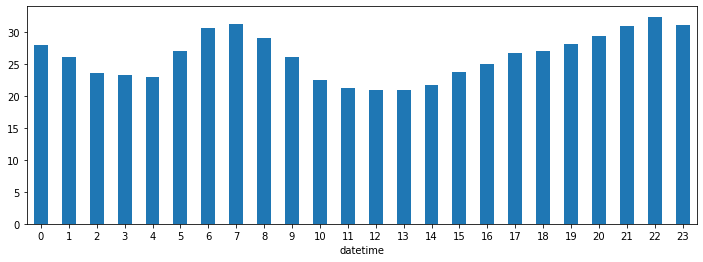

In [20]:
# 시간별 평균 측정값 시각화
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))

air_quality.groupby(
    air_quality["datetime"].dt.hour
)["value"].mean().plot.bar(
    rot=0, ax=ax
)

plt.show()

### <font color="red">2-2-3. 시계열 데이터 인덱스</font>

In [ ]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

날짜-시간 데이터를 index로 사용하면 더욱 다양한 기능을 제공한다. 이 경우, 우선 날짜-시간 관련 특정 데이터를 추출하려면 dt 속성을 사용할 필요 없이 바로 호출하면 된다.

In [ ]:
no_2.index.year, no_2.index.weekday

문자열을 제시하면 자동으로 날짜-시간 데이터로 변환해서 index를 slicing 할 수 있다.

In [ ]:
# 2019년 5월 20일부터 21일까지 측정한 값들 시각화
no_2["2019-05-20":"2019-05-21"].plot()

In [ ]:
# 2019년 5월 7일부터 13일까지 24시간 간격으로 측정한 값들 시각화
no_2["2019-05-07":"2019-05-13":24].plot()

날짜-시간 데이터를 slicing 할 때, step offset은 시간 단위로 설정된다.

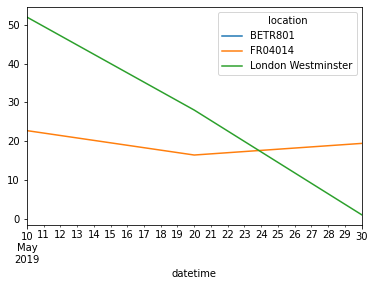

In [25]:
# 5월 10일, 20일, 30일에 측정한 값들 시각화


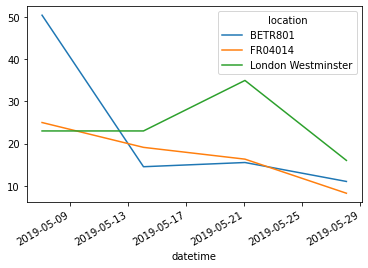

In [26]:
# 5월 중 일주일 간격으로 측정한 값들 시각화


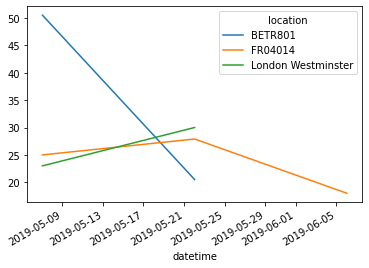

In [27]:
# 기록 시작일부터 종료일까지 보름 간격으로 측정한 값들 시각화


### <font color="red">2-2-4. 시계열 데이터 리샘플링</font>

Dataframe의 index가 날짜-시간 데이터로 되어 있는 경우, `resample` 함수를 사용해서 측정 기록 기준 시간(frequency)을 재설정할 수 있다.

In [ ]:
# 월간 최고 측정값 조회
monthly_max = no_2.resample("M").max()
monthly_max

`resample` 함수는 `groupby` 함수와 유사하게 사용하는데, 다음과 같은 조건이 필요하다.

- frequency를 문자열로 입력한다(M, 5H 등).
- 통계 관련 함수를 사용한다(mean, max 등).

In [ ]:
# frequency 확인
monthly_max.index.freq

In [ ]:
# 일간 평균 측정값 시각화
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))

**주요 frequency 문자열**

- A: 연도
- M: 월
- D: 일
- B: 영업일(business day)
- W: 주(7일)
- H: 시
- T 또는 min: 분
- S: 초

In [ ]:
# 일주일 간격으로 평균 측정값 구하기
no_2.resample("W").mean()

In [ ]:
# 7일 간격으로 평균 측정값 구하기
no_2.resample("7D").mean()

In [ ]:
# 2019년 6월 1일부터 10일까지 1일 기준으로 최소 측정값 구하기
no_2["2019-06-01":"2019-06-10"].resample("D").min()

In [ ]:
# 2019년 6월 1일부터 10일까지 영업일 기준으로 최소 측정값 구하기
no_2["2019-06-01":"2019-06-10"].resample("B").min()

In [35]:
# 2019년 5월 19일에 3시간 간격으로 측정값 합계 구하기


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-19 00:00:00+00:00,65.0,122.6,147.0
2019-05-19 03:00:00+00:00,66.0,116.7,147.0
2019-05-19 06:00:00+00:00,84.0,95.2,107.0
2019-05-19 09:00:00+00:00,50.5,96.6,85.0
2019-05-19 12:00:00+00:00,53.5,72.7,83.0
2019-05-19 15:00:00+00:00,69.0,98.1,84.0
2019-05-19 18:00:00+00:00,56.5,119.5,91.0
2019-05-19 21:00:00+00:00,47.5,64.2,96.0
